# Taller: Construcción e implementación de , Random Forest 

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [13]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [14]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [15]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB
None

Estadísticas descriptivas:

              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50% 

,Price,Year,Mileage
count,10495.000000,10495.000000,10495.000000
mean,14538.403716,2013.553883,52509.430395
std,3922.420961,3.116585,36791.736601
min,5002.000000,1998.000000,5.000000
25%,11999.000000,2012.000000,26461.000000
50%,15000.000000,2014.000000,41680.000000
75%,16999.000000,2016.000000,71355.500000
max,32444.000000,2018.000000,232658.000000



Valores nulos por columna:


Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

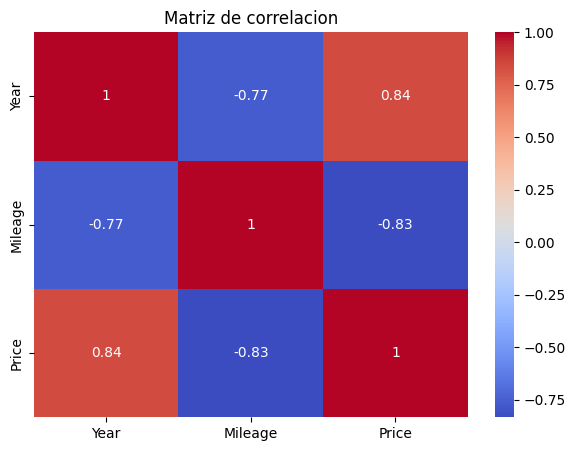

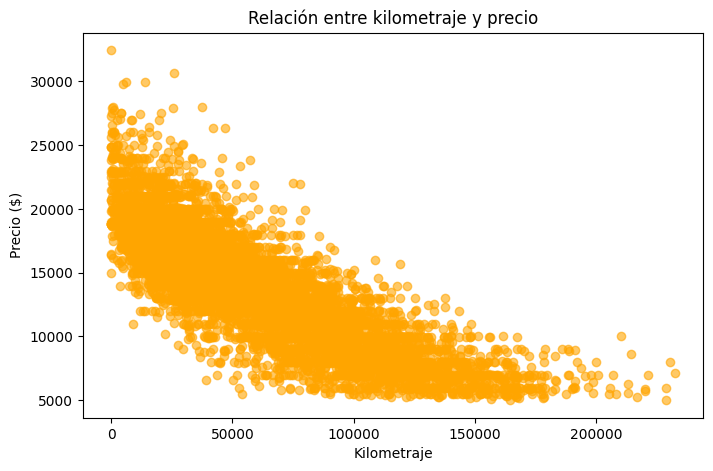

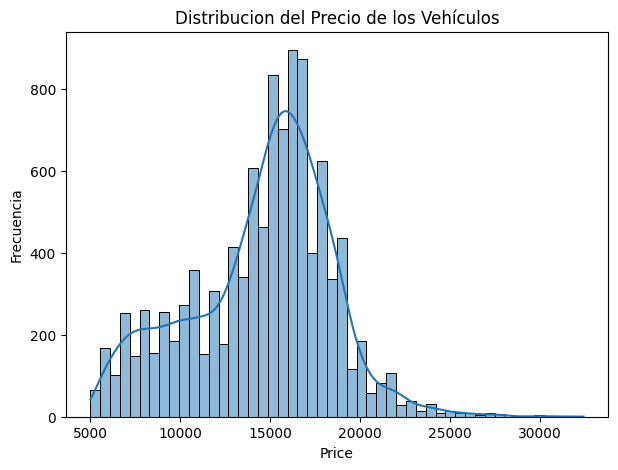

In [ ]:
# celda 0 - exploracion y analisis de datos
# modelo coorelacion

import matplotlib.pyplot as plt
import seaborn as sns

# Información general
print("Información general del dataset:\n")
print(data.info())

# Estadísticas descriptivas 
print("\nEstadísticas descriptivas:\n")
print(data.describe())

# Resumen variables 
print("\nResumen estadistico:")
display(data.describe())

# Verificacion valores nulos
print("\nValores nulos por columna:")
display(data.isnull().sum())

# matriz de correlacion entre valores numericos
plt.figure(figsize=(7,5))
sns.heatmap(data[['Year','Mileage','Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

# Relación entre precio y kilometraje
plt.figure(figsize=(8,5))
plt.scatter(data['Mileage'], data['Price'], alpha=0.6, color='orange')
plt.title('Relación entre kilometraje y precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio ($)')
plt.show()

# distribucion de la variable objetivo price
plt.figure(figsize=(7,5))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribucion del Precio de los Vehículos')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [20]:
# Celda 1

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# copia del dataset limpio
df = data.copy()

# columnas numericas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# variables categoricas
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# texto a números para que el modelo pueda trabajar
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# variables predictoras 
X = df.drop(columns=['Price'])
y = df['Price']

# datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# entrenar el modelo
rf.fit(X_train, y_train)

#  predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Resultados
print("Desempeño del modelo RF:\n")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")


#
# El modelo Random Forest ofrece un buen equilibrio entre sesgo y varianza.
# Si el R² es alto (cercano a 1), significa que el modelo explica bien la variabilidad del precio.
# MAE y RMSE permiten medir qué tan lejos están las predicciones del valor real.
# Las variables con mayor importancia ayudan a entender qué factores influyen más en el precio.


Desempeño del modelo RF:

Mean Squared Error (MSE): 3,164,071.97
R² Score: 0.794
Mean Absolute Error (MAE): 1,320.93
Mean Absolute Percentage Error (MAPE): 9.58 %


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 5 folds for each of 50 candidates, totalling 250 fits

RandomizedSearchCV configurado:

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)


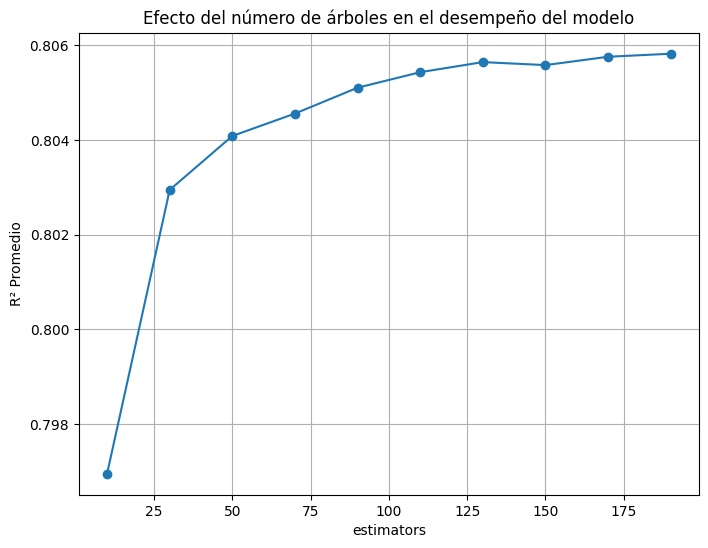

Mejor número de árboles (estimators): 190
Mejor R² promedio: 0.8058


In [32]:
# Celda 2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

param_distributions = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

# Mostrar objeto para que la salida se parezca a la de tu captura
print("\nRandomizedSearchCV configurado:\n")
print(rand_search)

# Rango de valores para n_estimators (cantidad de árboles)
estimator_range = range(10, 210, 20)

# Almacenar el desempeño promedio
r2_scores = []

# Validación cruzada para cada valor de n_estimators
for n in estimator_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='r2').mean()
    r2_scores.append(score)

# Gráfica del desempeño vs número de árboles
plt.figure(figsize=(8,6))
plt.plot(estimator_range, r2_scores, marker='o')
plt.xlabel('estimators')
plt.ylabel('R² Promedio')
plt.title('Efecto del número de árboles en el desempeño del modelo')
plt.grid(True)
plt.show()

# Mejor valor encontrado
best_n = estimator_range[r2_scores.index(max(r2_scores))]
print(f"Mejor número de árboles (estimators): {best_n}")
print(f"Mejor R² promedio: {max(r2_scores):.4f}")


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Imprimir mejores hiperparámetros
best_params = rand_search.best_params_
print("Mejores Hiperparámetros:")
print(best_params)

# Reentrenar (opcional, RandomizedSearchCV ya refit=True por defecto)
best_rf = rand_search.best_estimator_

# Predicciones sobre el conjunto de test
y_pred_best = best_rf.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

# Imprimir resultados en formato similar al tuyo
print("\nDesempeño del modelo RF calibrado:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")



Mejores Hiperparámetros:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo RF calibrado:
Mean Squared Error: 2,478,117.42
R^2 Score: 0.839
Mean Absolute Error (MAE): 1,150.13
Mean Absolute Percentage Error (MAPE): 8.37 %


In [35]:
import pandas as pd
import numpy as np

# Obtener importancias desde el mejor estimador
importances = best_rf.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordenar de mayor a menor y resetear índice para presentación
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Mostrar la tabla (similar a tu captura)
print("\nFeature\tImportance")
print(feat_imp.to_string(index=False, float_format='%.6f'))


Feature	Importance
    Feature  Importance
       Year    0.444531
    Mileage    0.427266
 M_Camry4dr    0.068417
  M_CamrySE    0.021669
 M_CamryXLE    0.018507
  M_CamryLE    0.007558
    M_Camry    0.006543
   M_CamryL    0.002901
M_CamryBase    0.002606


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

try:
    model_to_use = best_rf
    y_pred_final = y_pred_best
    note = "Resultados del modelo calibrado (best_rf)."
except NameError:
    model_to_use = rf_model
    y_pred_final = y_pred
    note = "Resultados del modelo base (rf_model)."

print( note, "\n")

mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

print("Métricas finales del modelo:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:,.2f} USD")
print(f"MSE: {mse:,.2f}")
print(f"RMSE: {rmse:,.2f} USD")
print(f"MAPE: {mape:.2f} %\n")

try:
    importances = model_to_use.feature_importances_
    feat_names = X_train.columns
    feat_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
    feat_imp = feat_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
    print("Importancia de variables (ordenada):")
    print(feat_imp.to_string(index=False, float_format='%.6f'))
except Exception as e:
    print("No se pudo calcular importancias de variables:", e)

print("\nConclusiones:\n")
print("1. Rendimiento:")
print("   - El modelo explica una proporción alta de la variabilidad del precio (R² cercano a {:.2f}).".format(r2))
print("   - El MAE (~{:,} USD) y el RMSE (~{:,} USD) indican que, en promedio, las predicciones se desvían razonablemente respecto al precio real.".format(int(mae), int(rmse)))
print("   - El MAPE (~{:.2f} %) muestra que el error porcentual medio es bajo, lo que hace al modelo útil para estimaciones comerciales.\n".format(mape))

print("2. Interpretación de características:")
print("   - 'Year' y 'Mileage' son, con diferencia, las variables más importantes en la predicción del precio, lo cual es coherente con la lógica económica (autos más nuevos y con menos recorrido valen más).")
print("   - Las dummies de modelo (M_Camry4dr, M_CamrySE, etc.) aportan información adicional aunque en menor magnitud.\n")

print("3. Recomendaciones para mejorar el modelo:")
print("   - Probar ingeniería de características: transformar 'Mileage' (log), crear interacciones (Year * Mileage) o añadir variables extra si están disponibles (condición, transmisión, localización).")
print("   - Realizar búsqueda de hiperparámetros más amplia (GridSearch) o validación anidada para estimar mejor el rendimiento generalizable.")
print("   - Considerar modelos complementarios (Boosting: XGBoost/LightGBM) y comparar con Random Forest.\n")

print("4. Limitaciones:")
print("   - El dataset filtrado solo contiene Camry, las conclusiones pueden no generalizar a otras marcas/modelos.")
print("   - No se evaluó la robustez frente a datos atípicos (outliers) ni se hizo análisis de sensibilidad.\n")


Resultados del modelo calibrado (best_rf). 

Métricas finales del modelo:
R²: 0.8390
MAE: 1,150.13 USD
MSE: 2,478,117.42
RMSE: 1,574.20 USD
MAPE: 8.37 %

Importancia de variables (ordenada):
    Feature  Importance
       Year    0.444531
    Mileage    0.427266
 M_Camry4dr    0.068417
  M_CamrySE    0.021669
 M_CamryXLE    0.018507
  M_CamryLE    0.007558
    M_Camry    0.006543
   M_CamryL    0.002901
M_CamryBase    0.002606

Conclusiones:

1. Rendimiento:
   - El modelo explica una proporción alta de la variabilidad del precio (R² cercano a 0.84).
   - El MAE (~1,150 USD) y el RMSE (~1,574 USD) indican que, en promedio, las predicciones se desvían razonablemente respecto al precio real.
   - El MAPE (~8.37 %) muestra que el error porcentual medio es bajo, lo que hace al modelo útil para estimaciones comerciales.

2. Interpretación de características:
   - 'Year' y 'Mileage' son, con diferencia, las variables más importantes en la predicción del precio, lo cual es coherente con la ló

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.